In [1]:
import pyforest

import catboost as catt
import lightgbm as lgb
import xgboost as xgb


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold

import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('Datasets/Train.csv', parse_dates=['Date'])
test=pd.read_csv('Datasets/Test.csv', parse_dates=['Date'])

display(train.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [5]:
train.shape, test.shape

((30557, 82), (16136, 77))

In [6]:
drop_columns=['target_min','target_max','target_variance','target_count']
print("The shape before dropping was:", train.shape)
train=train.drop(columns=drop_columns)
print("The shape after dropping is:", train.shape)

The shape before dropping was: (30557, 82)
The shape after dropping is: (30557, 78)


Sorting the data based on the date


In [7]:
train=train.sort_values(by=['Date']).reset_index(drop=True)
test=test.sort_values(by=['Date']).reset_index(drop=True)

In [8]:
train.head()

,Place_ID X Date,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,11.000000,60.200001,0.008040,18.516840,1.996377,-1.227395,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,R8CIARR X 2020-01-02,2020-01-02,R8CIARR,210.0,7.600000,92.900002,0.003340,-0.923163,1.186377,0.442605,...,17.114866,-164.471834,68.996603,1838.009277,3136.416992,0.007221,-98.006920,18.329800,-164.326263,69.203545
2,1X421B8 X 2020-01-02,2020-01-02,1X421B8,69.0,30.350000,97.450001,0.014210,18.806818,-0.948623,-0.937395,...,9.270202,-150.037324,40.684037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1OBVR6 X 2020-01-02,2020-01-02,D1OBVR6,33.0,24.733333,49.883334,0.008353,19.320164,0.799710,3.212605,...,5.505470,-156.125827,47.288412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R0N919B X 2020-01-02,2020-01-02,R0N919B,57.0,27.760000,52.140000,0.008930,22.560834,-1.481623,-1.181395,...,35.838265,-67.567808,36.387296,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train.Date.max(), train.Date.min()

(Timestamp('2020-04-04 00:00:00'), Timestamp('2020-01-02 00:00:00'))

In [10]:
test.Date.max(), test.Date.min()

(Timestamp('2020-04-04 00:00:00'), Timestamp('2020-01-02 00:00:00'))

Data description and info

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
target,30557.0,61.148045,46.861309,1.000000,25.000000,50.000000,80.000000,815.000000
precipitable_water_entire_atmosphere,30557.0,15.302326,10.688573,0.420044,7.666667,12.200000,19.900000,72.599998
relative_humidity_2m_above_ground,30557.0,70.552747,18.807884,5.128572,58.600002,74.099998,85.450001,100.000000
specific_humidity_2m_above_ground,30557.0,0.006004,0.003787,0.000139,0.003403,0.004912,0.007562,0.021615
temperature_2m_above_ground,30557.0,9.321342,9.343226,-34.647879,3.123071,8.478424,16.201563,37.437921
...,...,...,...,...,...,...,...,...
L3_CH4_aerosol_optical_depth,5792.0,0.016227,0.027016,0.000000,0.000000,0.000000,0.023829,0.210483
L3_CH4_sensor_azimuth_angle,5792.0,1.254703,55.101250,-105.367363,0.000000,0.000000,62.245728,77.355232
L3_CH4_sensor_zenith_angle,5792.0,13.849040,18.004375,0.000000,0.000000,0.000000,27.412303,59.972710
L3_CH4_solar_azimuth_angle,5792.0,-69.098594,84.702355,-179.947422,-161.726937,0.000000,0.000000,179.813344


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Place_ID X Date                                      30557 non-null  object        
 1   Date                                                 30557 non-null  datetime64[ns]
 2   Place_ID                                             30557 non-null  object        
 3   target                                               30557 non-null  float64       
 4   precipitable_water_entire_atmosphere                 30557 non-null  float64       
 5   relative_humidity_2m_above_ground                    30557 non-null  float64       
 6   specific_humidity_2m_above_ground                    30557 non-null  float64       
 7   temperature_2m_above_ground                          30557 non-null  float64       
 

Missing values

In [13]:
train.isnull().sum()

Place_ID X Date                             0
Date                                        0
Place_ID                                    0
target                                      0
precipitable_water_entire_atmosphere        0
                                        ...  
L3_CH4_aerosol_optical_depth            24765
L3_CH4_sensor_azimuth_angle             24765
L3_CH4_sensor_zenith_angle              24765
L3_CH4_solar_azimuth_angle              24765
L3_CH4_solar_zenith_angle               24765
Length: 78, dtype: int64

In [16]:
percentage_missing=train.isnull().sum()*100/len(train)
missing_df_train=pd.DataFrame({"columns":train.columns, "%missing":percentage_missing})
missing_df_train

<IPython.core.display.Javascript object>

,columns,%missing
Place_ID X Date,Place_ID X Date,0.00000
Date,Date,0.00000
Place_ID,Place_ID,0.00000
target,target,0.00000
precipitable_water_entire_atmosphere,precipitable_water_entire_atmosphere,0.00000
...,...,...
L3_CH4_aerosol_optical_depth,L3_CH4_aerosol_optical_depth,81.04526
L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_azimuth_angle,81.04526
L3_CH4_sensor_zenith_angle,L3_CH4_sensor_zenith_angle,81.04526
L3_CH4_solar_azimuth_angle,L3_CH4_solar_azimuth_angle,81.04526


In [15]:
test.isnull().sum()

Place_ID X Date                             0
Date                                        0
Place_ID                                    0
precipitable_water_entire_atmosphere        0
relative_humidity_2m_above_ground           0
                                        ...  
L3_CH4_aerosol_optical_depth            13021
L3_CH4_sensor_azimuth_angle             13021
L3_CH4_sensor_zenith_angle              13021
L3_CH4_solar_azimuth_angle              13021
L3_CH4_solar_zenith_angle               13021
Length: 77, dtype: int64

In [17]:
percentage_missing = test.isnull().sum()*100/len(test)
missing_df_test= pd.DataFrame({"columns": test.columns, "%missing": percentage_missing})
missing_df_test


<IPython.core.display.Javascript object>

,columns,%missing
Place_ID X Date,Place_ID X Date,0.00000
Date,Date,0.00000
Place_ID,Place_ID,0.00000
precipitable_water_entire_atmosphere,precipitable_water_entire_atmosphere,0.00000
relative_humidity_2m_above_ground,relative_humidity_2m_above_ground,0.00000
...,...,...
L3_CH4_aerosol_optical_depth,L3_CH4_aerosol_optical_depth,80.69534
L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_azimuth_angle,80.69534
L3_CH4_sensor_zenith_angle,L3_CH4_sensor_zenith_angle,80.69534
L3_CH4_solar_azimuth_angle,L3_CH4_solar_azimuth_angle,80.69534


### imputing missing values
- mean-numerical
- mode-categorical
- median

- high arbitrary value=-99999999
- knn imputer 
- lgbm imputer
- iterative

### Time series data
- leave missing values
- ffill()
- bfill()

In [19]:
col_to_drop=percentage_missing[percentage_missing>60].keys()

In [20]:
train=train.drop(col_to_drop, axis=1)
test=test.drop(col_to_drop, axis=1)

In [21]:
train.shape, test.shape

((30557, 71), (16136, 70))

In [22]:
train.isnull().sum()

Place_ID X Date                            0
Date                                       0
Place_ID                                   0
target                                     0
precipitable_water_entire_atmosphere       0
                                        ... 
L3_SO2_cloud_fraction                   7237
L3_SO2_sensor_azimuth_angle             7237
L3_SO2_sensor_zenith_angle              7237
L3_SO2_solar_azimuth_angle              7237
L3_SO2_solar_zenith_angle               7237
Length: 71, dtype: int64

In [23]:
train=train.ffill()

In [24]:
test.isnull().sum()

Place_ID X Date                            0
Date                                       0
Place_ID                                   0
precipitable_water_entire_atmosphere       0
relative_humidity_2m_above_ground          0
                                        ... 
L3_SO2_cloud_fraction                   4173
L3_SO2_sensor_azimuth_angle             4173
L3_SO2_sensor_zenith_angle              4173
L3_SO2_solar_azimuth_angle              4173
L3_SO2_solar_zenith_angle               4173
Length: 70, dtype: int64

In [25]:
test=test.ffill()

In [27]:
test.isnull().sum()

Place_ID X Date                         0
Date                                    0
Place_ID                                0
precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
                                       ..
L3_SO2_cloud_fraction                   0
L3_SO2_sensor_azimuth_angle             0
L3_SO2_sensor_zenith_angle              0
L3_SO2_solar_azimuth_angle              0
L3_SO2_solar_zenith_angle               0
Length: 70, dtype: int64

EDA

Target Distribution

<IPython.core.display.Javascript object>

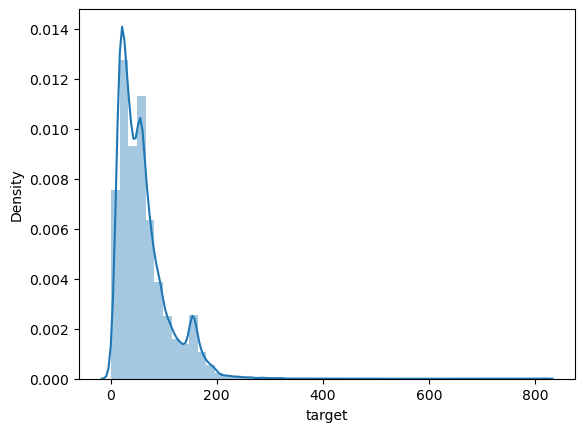

In [30]:
sns.distplot(train['target']);

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='target'>

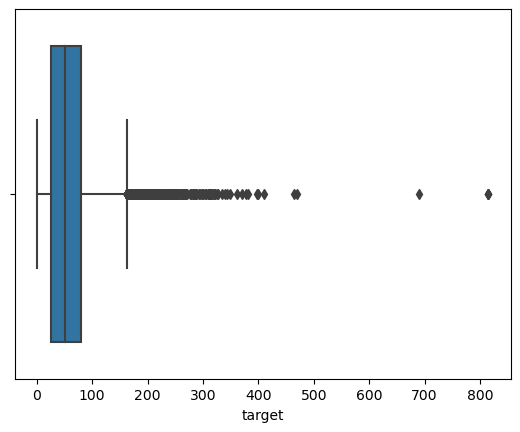

In [31]:
sns.boxplot(train['target']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

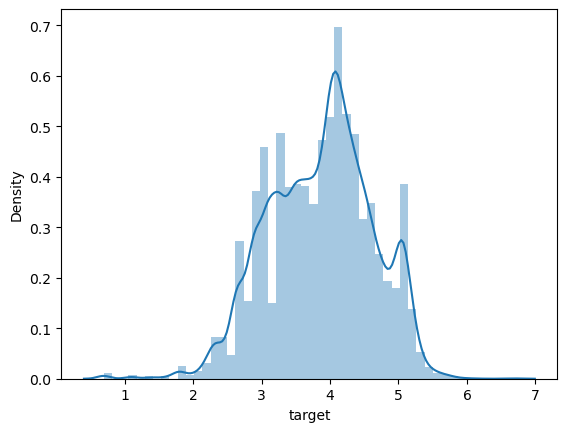

In [33]:
sns.distplot(np.log1p(train['target']));


In [34]:
cat_columns=[col for col in train.select_dtypes('object').columns if col not in ['Place_ID X Date']]
num_columns=[col for col in train.select_dtypes(['int','float']).columns if col not in ['target']]
date_columns=[col for col in train.select_dtypes('datetime').columns]
print(cat_columns)
print(num_columns)
print(date_columns)

['Place_ID']
['precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground', 'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_NO2_column_number_density', 'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction', 'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle', 'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle', 'L3_NO2_solar_zenith_angle', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_NO2_tropopause_pressure', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature', 'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle', 'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle', 'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height', 'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_ang

In [39]:
train.Place_ID.head()

0    010Q650
1    R8CIARR
2    1X421B8
3    D1OBVR6
4    R0N919B
Name: Place_ID, dtype: object

In [40]:
train.Place_ID.nunique()

340

Preprocessing categorical data
- label encoding- high cardinality
- one hot encoding
- get_dummies

In [41]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in cat_columns:
    train[col]=le.fit_transform(train[col])
    test[col]=le.fit_transform(test[col])

In [43]:
train['Place_ID'].head()

0      0
1    260
2     25
3    130
4    259
Name: Place_ID, dtype: int32

Date engineered features

In [44]:
train.Date.head()

0   2020-01-02
1   2020-01-02
2   2020-01-02
3   2020-01-02
4   2020-01-02
Name: Date, dtype: datetime64[ns]

In [45]:
for data in [train, test]:
    for col in date_columns:
        data[f'{col}_year']=data[col].dt.year
        data[f'{col}_month']=data[col].dt.month
        data[f'{col}_day']=data[col].dt.day

In [46]:
train.head()

,Place_ID X Date,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,...,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,Date_year,Date_month,Date_day
0,010Q650 X 2020-01-02,2020-01-02,0,38.0,11.000000,60.200001,0.008040,18.516840,1.996377,-1.227395,...,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,2020,1,2
1,R8CIARR X 2020-01-02,2020-01-02,260,210.0,7.600000,92.900002,0.003340,-0.923163,1.186377,0.442605,...,0.000150,-2.049941,0.245479,-101.813305,17.114866,-164.471834,68.996603,2020,1,2
2,1X421B8 X 2020-01-02,2020-01-02,25,69.0,30.350000,97.450001,0.014210,18.806818,-0.948623,-0.937395,...,0.000018,-2.568235,0.293534,-101.966000,9.270202,-150.037324,40.684037,2020,1,2
3,D1OBVR6 X 2020-01-02,2020-01-02,130,33.0,24.733333,49.883334,0.008353,19.320164,0.799710,3.212605,...,0.000043,-1.541329,0.006099,-102.531399,5.505470,-156.125827,47.288412,2020,1,2
4,R0N919B X 2020-01-02,2020-01-02,259,57.0,27.760000,52.140000,0.008930,22.560834,-1.481623,-1.181395,...,0.000172,0.876192,0.175392,-106.659424,35.838265,-67.567808,36.387296,2020,1,2


In [47]:
train['Date_month'].value_counts()

3    10023
1     9717
2     9507
4     1310
Name: Date_month, dtype: int64

In [48]:
test['Date_month'].value_counts()

3    5400
1    5083
2    4981
4     672
Name: Date_month, dtype: int64

Train_Test_split

In [49]:
X=train.drop(columns=['target','Place_ID X Date'])
y=train['target']
test=test[X.columns]

Using catboost as the baseline

In [50]:
model=catt.CatBoostRegressor(random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(X,y, random_state=42)

In [51]:
print(y_train.mean(), y_valid.mean())

61.284849674913815 60.73768324607331


In [52]:
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=200)

Learning rate set to 0.083261
0:	learn: 45.8817507	test: 45.5598519	best: 45.5598519 (0)	total: 3.19s	remaining: 53m 3s
200:	learn: 27.8471598	test: 30.6198782	best: 30.6198782 (200)	total: 9.71s	remaining: 38.6s
400:	learn: 23.8722149	test: 28.5977557	best: 28.5977557 (400)	total: 17.7s	remaining: 26.4s
600:	learn: 21.2498457	test: 27.6259271	best: 27.6259271 (600)	total: 25.9s	remaining: 17.2s
800:	learn: 19.2735477	test: 27.0108693	best: 27.0108693 (800)	total: 34.4s	remaining: 8.55s
999:	learn: 17.7636357	test: 26.6282372	best: 26.6254607 (997)	total: 41.5s	remaining: 0us

bestTest = 26.62546067
bestIteration = 997

Shrink model to first 998 iterations.


In [53]:
preds=model.predict(test)

In [54]:
preds

array([ 46.46568467, 178.10888841,  61.35115143, ...,  28.22747466,
        38.52748265,  45.42831898])

In [56]:
submission=pd.read_csv('Datasets/SampleSubmission.csv')
submission.head()

<IPython.core.display.Javascript object>

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,0
1,0OS9LVX X 2020-01-03,0
2,0OS9LVX X 2020-01-04,0
3,0OS9LVX X 2020-01-05,0
4,0OS9LVX X 2020-01-06,0
